#####LOAD AND PREPARE THE DATASETS

In [0]:
file_location= "/FileStore/tables/clinicaltrial_2023.csv"

clinicaltrial_2023_df = spark.read.text(file_location)

clinicaltrial_2023_df = clinicaltrial_2023_df.selectExpr("split(value, '\t') as data")

for i in range(14):  # Assuming there are 14 columns
  clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn(f"col_{i+1}", clinicaltrial_2023_df.data[i])

clinicaltrial_2023_df = clinicaltrial_2023_df.drop("data")

display(clinicaltrial_2023_df)

col_1 col_2 col_3 col_4 col_5 col_6 col_7 col_8 col_9 col_10 col_11 col_12 col_13 col_14 "Id Study Title Acronym Status Conditions Interventions Sponsor Collaborators Enrollment Funder Type Type Study Design Start Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT03630471 Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India PRIDE COMPLETED Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse) BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care Sangath Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine 250.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2018-08-20 2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT05992571 Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity RECRUITING Cerebrovascular Function|Cognition OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB McMaster University Alzheimer's Society of Brant", Haldimand Norfolk," Hamilton Halton 30.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT", INVESTIGATOR," OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE 2023-10-25 2024-08",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT00237471 Impact of Tight Glycaemic Control in Acute Myocardial Infarction TERMINATED Myocardial Infarct|Hyperglycemia DRUG: Insulin (tight blood glucose control) Melbourne Health National Health and Medical Research Council"," Australia|Bristol-Myers Squibb 40.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT 2005-10 2006-05",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT03820271 New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation SUPERMELD RECRUITING Decompensated Cirrhosis|Liver Transplantation OTHER: SuperMELD Assistance Publique - Hôpitaux de Paris 500.0 OTHER INTERVENTIONAL Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: OTHER 2020-10-01 2023-10-01",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT06229171 InTake Care: Development and Validation of an Innovative"," Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention InTakeCare NOT_YET_RECRUITING Hypertension|Treatment Adherence and Compliance|Digital Health OTHER: adherence support system based on a vocal assistant Istituto Auxologico Italiano Istituti Clinici Scientifici Maugeri SpA|Politecnico di Milano 206.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: OTHER 2024-10-01 2026-04-01",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, "NCT02945371 Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life REV COMPLETED Smoking|Alcohol Drinking|Prescription

In [0]:
pharma_df = spark.read.csv("/FileStore/tables/pharma.csv", header=True, inferSchema=True)

In [0]:
clinicaltrial_2023_df.show()

+------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+--------------------+
|       col_1|               col_2|     col_3|             col_4|               col_5|               col_6|               col_7|               col_8|     col_9|     col_10|        col_11|              col_12|    col_13|              col_14|
+------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+--------------------+
|         "Id|         Study Title|   Acronym|            Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion",,,,,,...|
|"NCT03630471|Effectiveness of ...| 

In [0]:
pharma_df.show(truncate=False)

+-----------------------------------------------------------+----------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+-----------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#####FILTER HEADER ROWS 

In [0]:
clinicaltrial_2023_df1 = clinicaltrial_2023_df.filter((clinicaltrial_2023_df['col_1'] != '"Id') & (clinicaltrial_2023_df['col_2'] != 'Study Title') & (clinicaltrial_2023_df['col_3'] != 'Acronym') & (clinicaltrial_2023_df['col_4'] != 'Status') & (clinicaltrial_2023_df['col_5'] != 'Conditions') & (clinicaltrial_2023_df['col_6'] != 'Interventions') & (clinicaltrial_2023_df['col_7'] != 'Sponsor') & (clinicaltrial_2023_df['col_8'] != 'Collaborators') & (clinicaltrial_2023_df['col_9'] != 'Enrollment') & (clinicaltrial_2023_df['col_10'] != 'Funder Type') & (clinicaltrial_2023_df['col_11'] != 'Type') & (clinicaltrial_2023_df['col_12'] != 'Study Design') & (clinicaltrial_2023_df['col_13'] != 'Start') & (clinicaltrial_2023_df['col_14'] != 'Completion'))


In [0]:
clinicaltrial_2023_df1.show()

+------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------------+--------------------+----------+--------------------+
|       col_1|               col_2|     col_3|             col_4|               col_5|               col_6|               col_7|               col_8|  col_9|col_10|        col_11|              col_12|    col_13|              col_14|
+------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------------+--------------------+----------+--------------------+
|"NCT03630471|Effectiveness of ...|     PRIDE|         COMPLETED|Mental Health Iss...|BEHAVIORAL: PRIDE...|             Sangath|Harvard Medical S...|  250.0| OTHER|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28",,,,,,...|
|"NCT05992571|Oral Ketone Monoe...|          |        RECRUITING|Cer

#####CLEAN DATAFRAME

In [0]:
from pyspark.sql.functions import col
from pyspark.sql.functions import regexp_replace

# Remove comma and '|' symbol from all columns in the DataFrame
clinicaltrial_2023_df2 = clinicaltrial_2023_df1.select(*[regexp_replace(col(c), '[,]', '').alias(c) for c in clinicaltrial_2023_df.columns])

# Show the cleaned DataFrame
clinicaltrial_2023_df2.show(truncate=False)


+------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+------------------+------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+-----------+
|col_1       |col_2                                           

#####SELECTED COLUMNS FOR ANALYSIS

In [0]:
from pyspark.sql.functions import col

clinicaltrial_2023_df3 = clinicaltrial_2023_df2.select(
    col("col_1").alias("Id"),
    col("col_4").alias("Status"),
    col("col_5").alias("Conditions"),
    col("col_7").alias("Sponsor"),
    col("col_11").alias("Type"),
    col("col_12").alias("Study Design"),
    col("col_13").alias("Start"),
    col("col_14").alias("Completion"))
pharma_df1 = pharma_df.select(col("Parent_Company"))

In [0]:
clinicaltrial_2023_df3.show()

+------------+------------------+--------------------+--------------------+--------------+--------------------+----------+-----------+
|          Id|            Status|          Conditions|             Sponsor|          Type|        Study Design|     Start| Completion|
+------------+------------------+--------------------+--------------------+--------------+--------------------+----------+-----------+
|"NCT03630471|         COMPLETED|Mental Health Iss...|             Sangath|INTERVENTIONAL|Allocation: RANDO...|2018-08-20|2019-02-28"|
|"NCT05992571|        RECRUITING|Cerebrovascular F...| McMaster University|INTERVENTIONAL|Allocation: RANDO...|2023-10-25|   2024-08"|
|"NCT00237471|        TERMINATED|Myocardial Infarc...|    Melbourne Health|INTERVENTIONAL|Allocation: RANDO...|   2005-10|   2006-05"|
|"NCT03820271|        RECRUITING|Decompensated Cir...|Assistance Publiq...|INTERVENTIONAL|Allocation: NA|In...|2020-10-01|2023-10-01"|
|"NCT06229171|NOT_YET_RECRUITING|Hypertension|Trea...|I

In [0]:
pharma_df1.show()

+--------------------+
|      Parent_Company|
+--------------------+
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
| Abbott Laboratories|
|   Johnson & Johnson|
| Abbott Laboratories|
| Abbott Laboratories|
|   Johnson & Johnson|
|   Johnson & Johnson|
| Abbott Laboratories|
|              AbbVie|
|              AbbVie|
|              Pfizer|
|              Pfizer|
|Bristol-Myers Squibb|
|               Amgen|
|               Amgen|
|               Amgen|
|Amneal Pharmaceut...|
|     Astellas Pharma|
+--------------------+
only showing top 20 rows



#####PROBLEM STATEMENTS

#####TASK 1 : NUMBER OF STUDIES IN THE DATASET

In [0]:
# Number of studies in the dataset
distinct_studies_count_df = clinicaltrial_2023_df.distinct().count()
print("Number of studies in the dataset:", distinct_studies_count_df)

Number of studies in the dataset: 483423


#####TASK 2 : TYPES OF STUDIES IN THE DATASET ALONG WITH THE FREQUENCIES OF EACH TYPE ORDERED FROM MOST FREQUENT TO LEAST FREQUENT 

In [0]:
# List all types of studies with frequencies (ordered from most frequent to least frequent)
from pyspark.sql.functions import col, desc
# Filter out rows with null values in the 'Type' column
types_freq = clinicaltrial_2023_df3.filter(col("Type").isNotNull()) \
                                   .groupBy("Type").count() \
                                   .orderBy(desc("count"))

print("Types of studies with frequencies:")
types_freq.show(truncate=False)

Types of studies with frequencies:
+---------------+------+
|Type           |count |
+---------------+------+
|INTERVENTIONAL |371378|
|OBSERVATIONAL  |110221|
|EXPANDED_ACCESS|928   |
|               |889   |
+---------------+------+



#####TASK 3 : TOP 5 CONDITIONS WITH THEIR FREQUENCIES

In [0]:
from pyspark.sql import functions as F
# Split the Conditions column by '|'
split_conditions = clinicaltrial_2023_df3.withColumn("Condition", F.explode(F.split("Conditions", "\|")))
# Group by the Condition column and count occurrences
top_conditions = split_conditions.groupBy("Condition").count().orderBy(F.col("count").desc()).limit(5)
# Print the top conditions with frequencies
print("Top 5 conditions with frequencies:")
top_conditions.show(truncate=False)


Top 5 conditions with frequencies:
+-------------+-----+
|Condition    |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4071 |
|Hypertension |4020 |
+-------------+-----+



#####TASK 4 : 10 MOST COMMON SPONSORS THAT ARE NOR PHARMACEUTICAL COMPANIES, ALONG WITH NUMBER OF CLINICAL TRIALS THEY HAVE SPONSORED

In [0]:
# Filter out pharmaceutical companies from pharma_df DataFrame
pharma_companies = pharma_df.select("Parent_Company").distinct()

# Join clinicaltrial_2023_df2 DataFrame with pharma_companies DataFrame to filter out pharmaceutical sponsors
non_pharma_sponsors_df = clinicaltrial_2023_df3.join(pharma_companies, clinicaltrial_2023_df3.Sponsor == pharma_companies["Parent_Company"], "left_anti") \
                                              .groupBy("Sponsor").count() \
                                              .orderBy(col("count").desc()) \
                                              .limit(10)

# Print the top 10 non-pharmaceutical sponsors
print("Top 10 non-pharmaceutical sponsors:")
non_pharma_sponsors_df.show(truncate=False)


Top 10 non-pharmaceutical sponsors:
+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-----------------------------------------------------

#####TASK 5 : PLOT NUMBER OF COMPLETED STUDIES FOR EACH MONTH IN 2023

In [0]:
from pyspark.sql.functions import col

completed_studies_df = clinicaltrial_2023_df2.filter(
    (col('col_14').isNotNull()) & 
    (col('col_14') != '') & 
    (col('col_4') == 'COMPLETED') & 
    (col('col_14').contains('2023'))
)

# Extract month from the 'col_14' (Completion) column and count 1 for each month
completed_month_counts_df = completed_studies_df.select(
    col('col_14').substr(1, 7).alias('Month')
).groupBy('Month').count()

# Collect the results
completed_month_counts = completed_month_counts_df.collect()

In [0]:
# Displaying the values stored in completed_month_counts
print("Completed Month Counts:")
for row in completed_month_counts:
    print(row['Month'], "-", row['count'])


Completed Month Counts:
2023-08 - 1230
2023-12 - 1082
2023-11 - 909
2023-07 - 1360
2023-03 - 1552
2023-10 - 1058
2023-02 - 1272
2023-09 - 1152
2023-04 - 1324
2023-05 - 1415
2023-01 - 1494
2023-06 - 1619


#####VISUALIZATION FOR NUMBER OF COMPLETED STUDIES FOR EACH MONTH IN 2023

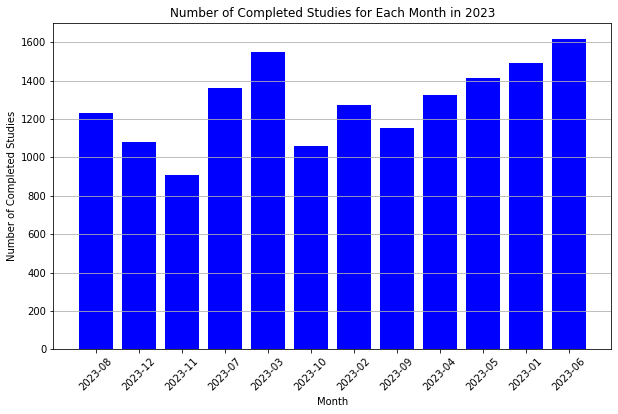

Values plotted for each month:
2023-08 - 1230
2023-12 - 1082
2023-11 - 909
2023-07 - 1360
2023-03 - 1552
2023-10 - 1058
2023-02 - 1272
2023-09 - 1152
2023-04 - 1324
2023-05 - 1415
2023-01 - 1494
2023-06 - 1619


In [0]:
# Plotting using matplotlib (or any other suitable tool)
import matplotlib.pyplot as plt

months = [row['Month'] for row in completed_month_counts]
counts = [row['count'] for row in completed_month_counts]

plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='blue')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies for Each Month in 2023')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Displaying the values plotted for each month
print("Values plotted for each month:")
for row in completed_month_counts:
    print(row['Month'], "-", row['count'])

#####FUTHER ANALYSIS USING USER DEFINED FUNCTIONS

#####ANALYSIS 2 : PLOT THE DISTRIBUTION OF STUDY STATUSES (AS CONTAINED IN THE STATUS COLUMN)

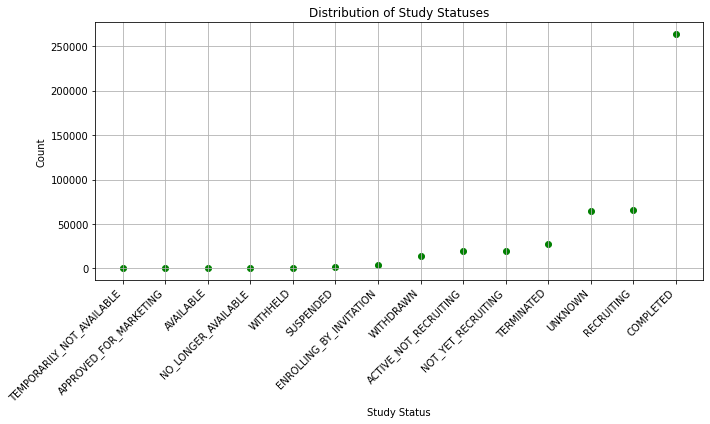

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
def study_status_analysis(df):
    # Group by study status and count
    status_counts = df.groupBy("col_4").count().orderBy("count")
    # Convert to Pandas DataFrame for easier plotting
    status_counts_df = status_counts.toPandas()
    # Plot the distribution of study statuses using a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(status_counts_df["col_4"], status_counts_df["count"], color='green')
    plt.title('Distribution of Study Statuses')
    plt.xlabel('Study Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.grid(True)  # Adding grid lines for better visualization
    plt.tight_layout()  # Adjusting layout to prevent overlap of labels
    plt.show()
# Call the function to analyze study statuses
study_status_analysis(clinicaltrial_2023_df2)
